# Evidencia 2: Construcción de un modelo estadístico base
### Diego Alberto Baños Lopez
### A01275100 

Una empresa automovilística china aspira a entrar en el mercado estadounidense.\
Desea establecer allí una unidad de fabricación y producir automóviles localmente para competir con sus contrapartes estadounidenses y europeas. \
Contrataron una empresa de consultoría de automóviles para identificar los principales factores de los que depende el precio de los automóviles, específicamente, en el mercado estadounidense, ya que pueden ser muy diferentes del mercado chino. Esencialmente, la empresa quiere saber:

* ¿Qué variables son significativas para predecir el precio de un automóvil?
* ¿Qué tan bien describen esas variables el precio de un automóvil?


### Importación de Bibliotecas
Importamos las librerias para el analisis del csv

In [1]:
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Leemos el archivo CSV y lo guardamos en un dataframe (df)

In [2]:
# Leer el archivo CSV
df = pd.read_csv('precios_autos.csv')

### Estadísticas Descriptivas
Ahora teniendo cargados los datos en el df podemos generar estadisticas descriptivas, las cuales incluyen:
- Media
- Desviación estándar
- Mínimo
- Cuartiles (25%, 50% y 75%)
- Máximo

Para las variables cualitativas, se calculan las frecuencias. 
Todo ello se genera con el fin de hacernos una idea de como es la distribución y las caracteristicas de las variables

In [3]:
# Exploración de la base de datos
print(df.head())
print(df.info())
print(df.describe())

   symboling                   CarName fueltype      carbody drivewheel  \
0          3        alfa-romero giulia      gas  convertible        rwd   
1          3       alfa-romero stelvio      gas  convertible        rwd   
2          1  alfa-romero Quadrifoglio      gas    hatchback        rwd   
3          2               audi 100 ls      gas        sedan        fwd   
4          2                audi 100ls      gas        sedan        4wd   

  enginelocation  wheelbase  carlength  carwidth  carheight  ...  enginetype  \
0          front       88.6      168.8      64.1       48.8  ...        dohc   
1          front       88.6      168.8      64.1       48.8  ...        dohc   
2          front       94.5      171.2      65.5       52.4  ...        ohcv   
3          front       99.8      176.6      66.2       54.3  ...         ohc   
4          front       99.4      176.6      66.4       54.3  ...         ohc   

  cylindernumber enginesize  stroke  compressionratio  horsepower  p

In [4]:
# Medidas estadísticas para variables cuantitativas
print(df.describe(include=[np.number]))

        symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000   
mean     0.834146   98.756585  174.049268   65.907805   53.724878   
std      1.245307    6.021776   12.337289    2.145204    2.443522   
min     -2.000000   86.600000  141.100000   60.300000   47.800000   
25%      0.000000   94.500000  166.300000   64.100000   52.000000   
50%      1.000000   97.000000  173.200000   65.500000   54.100000   
75%      2.000000  102.400000  183.100000   66.900000   55.500000   
max      3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize      stroke  compressionratio  horsepower  \
count   205.000000  205.000000  205.000000        205.000000  205.000000   
mean   2555.565854  126.907317    3.255415         10.142537  104.117073   
std     520.680204   41.642693    0.313597          3.972040   39.544167   
min    1488.000000   61.000000    2.070000          7.000000   48.000000  

In [5]:
# Medidas estadísticas para variables cualitativas
print(df.describe(include=[object]))

              CarName fueltype carbody drivewheel enginelocation enginetype  \
count             205      205     205        205            205        205   
unique            147        2       5          3              2          7   
top     toyota corona      gas   sedan        fwd          front        ohc   
freq                6      185      96        120            202        148   

       cylindernumber  
count             205  
unique              7  
top              four  
freq              159  


### Histogramas
Los histogramas nos ayudan a visualizar la distribución de los datos para cada variable cuantitativa. A través de los histogramas, podemos identificar si una variable tiene una distribución simétrica, asimétrica positiva o asimétrica negativa.

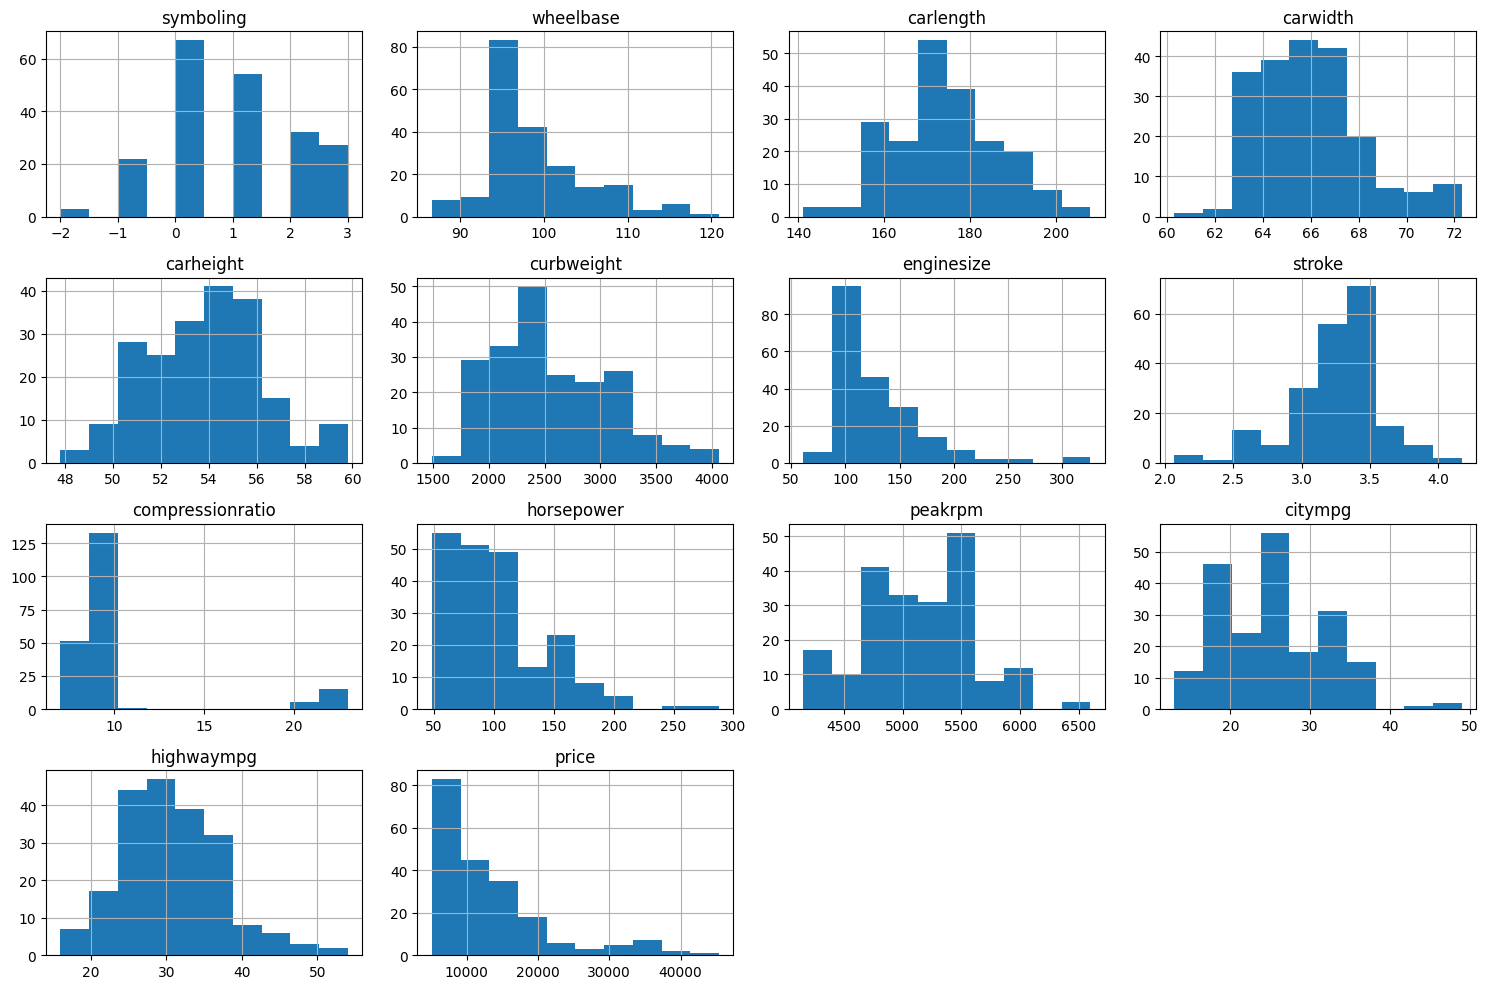

In [6]:
# Visualización de datos
# Histogramas para variables cuantitativas
df.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

### Boxplots
Los boxplots nos ayudaran a visualizar la distribución de las variables cuantitativas y para identificar valores atípicos. Un boxplot muestra la mediana (línea central del cuadro), cuartiles y posibles valores atípicos

c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


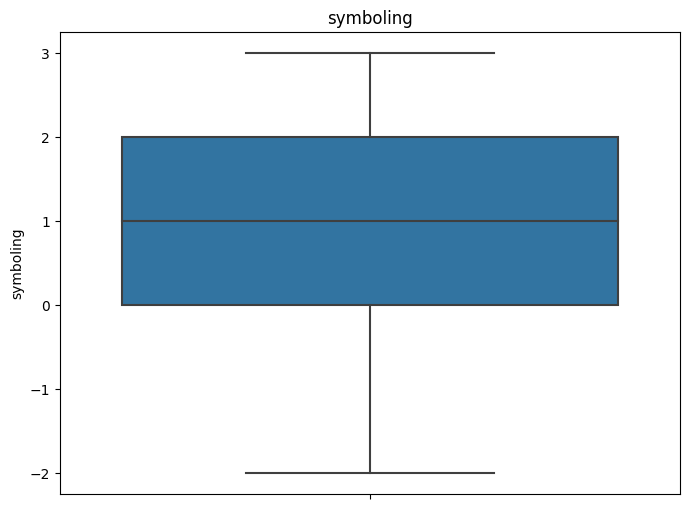

c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


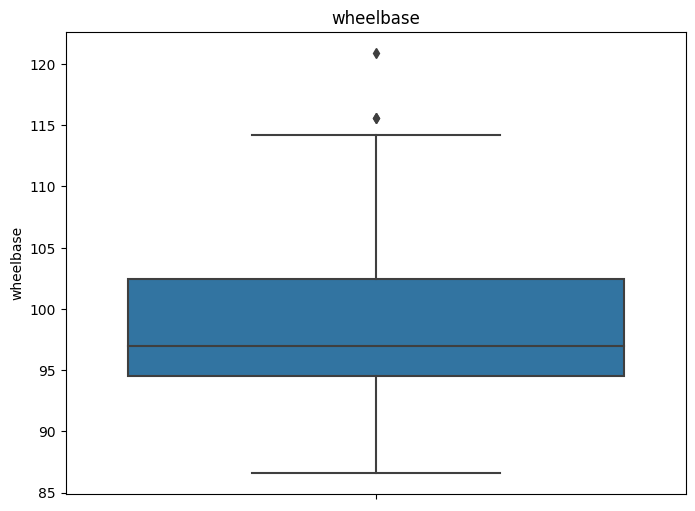

c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


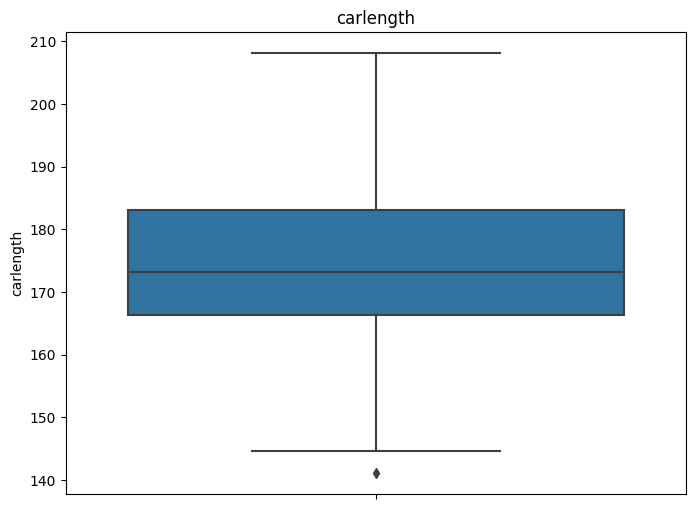

c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


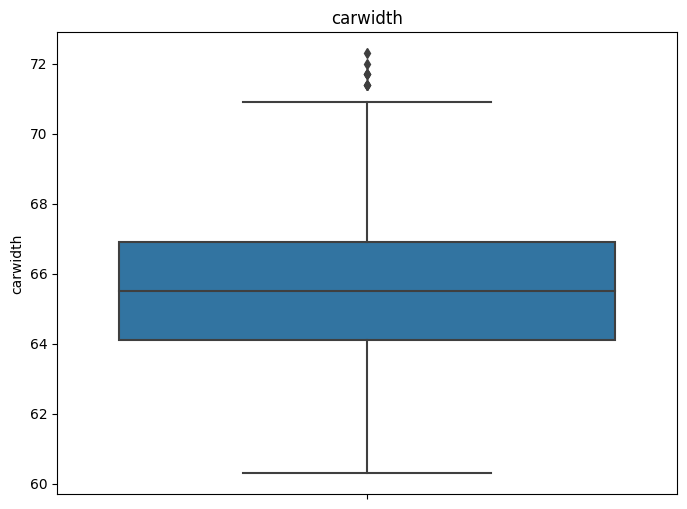

c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


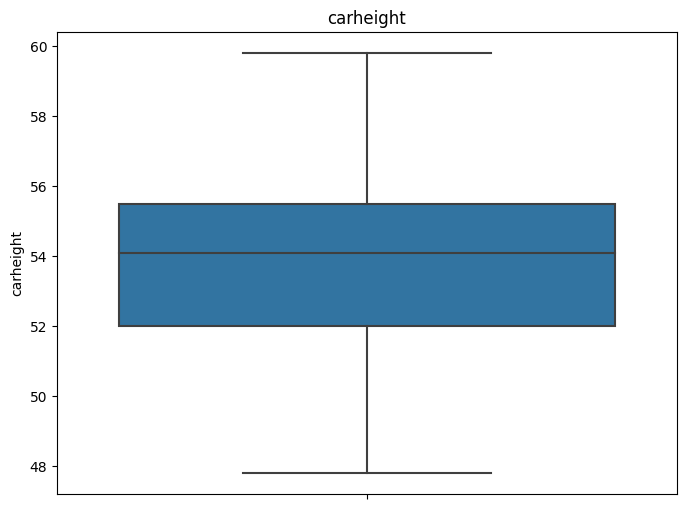

c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


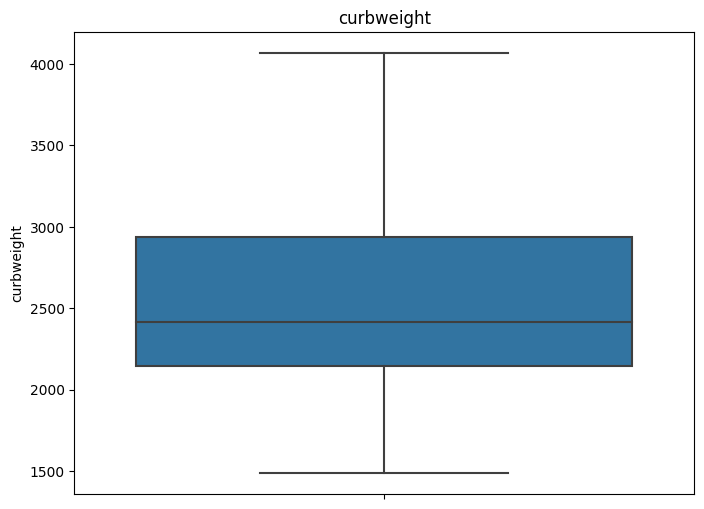

c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


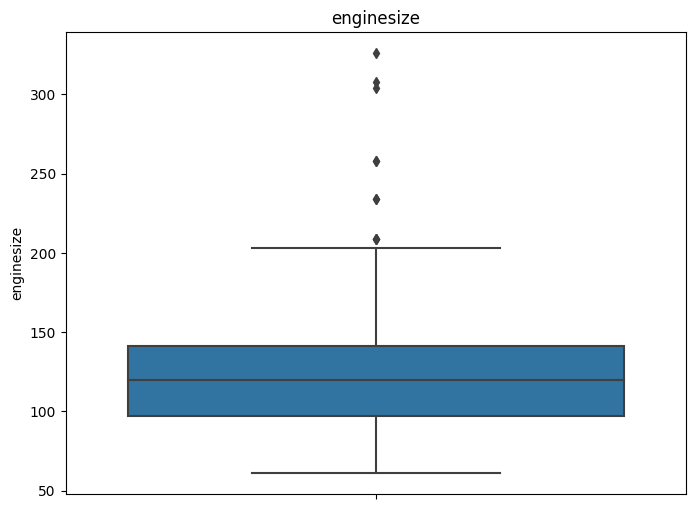

c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


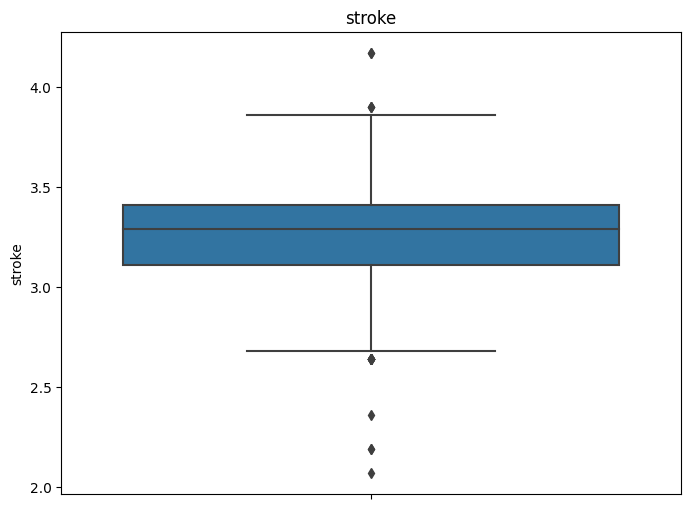

c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


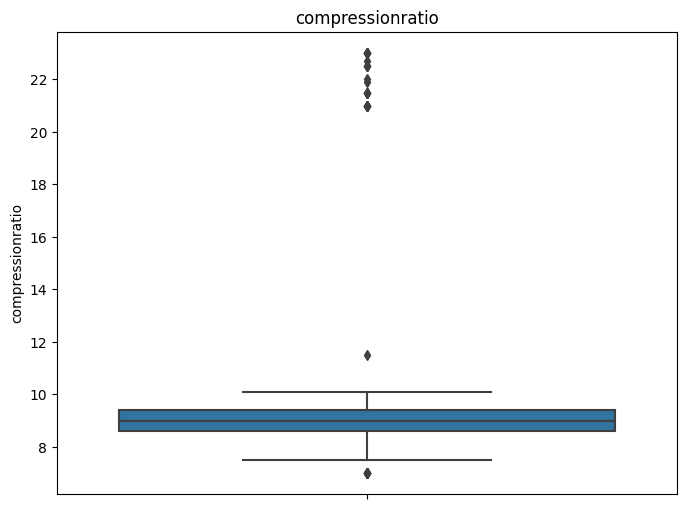

c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


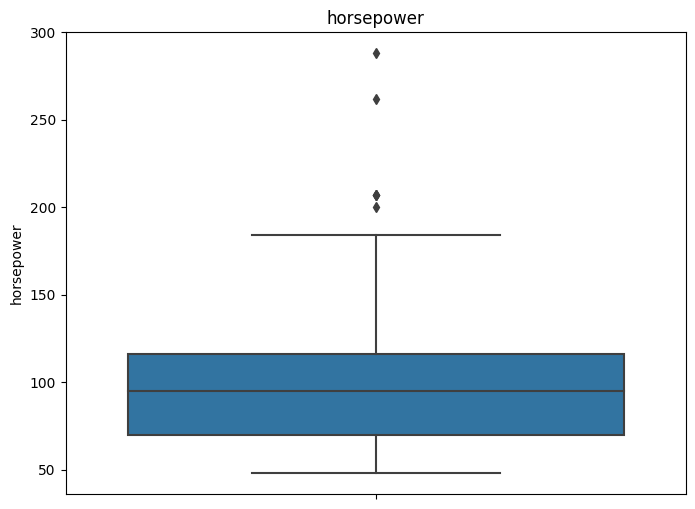

c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


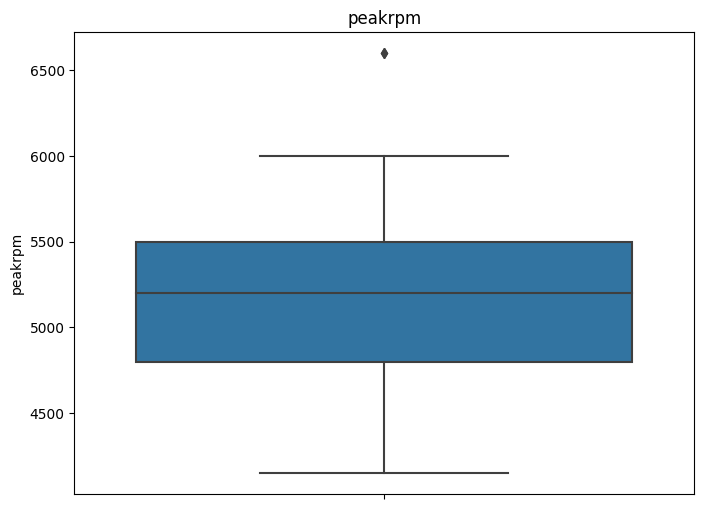

c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


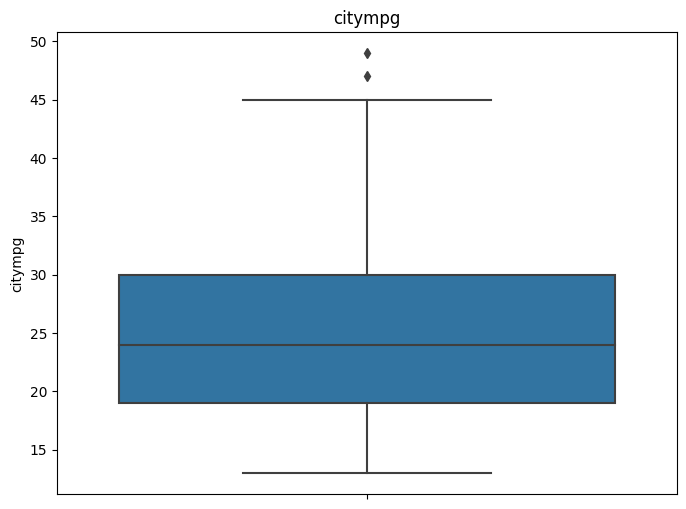

c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


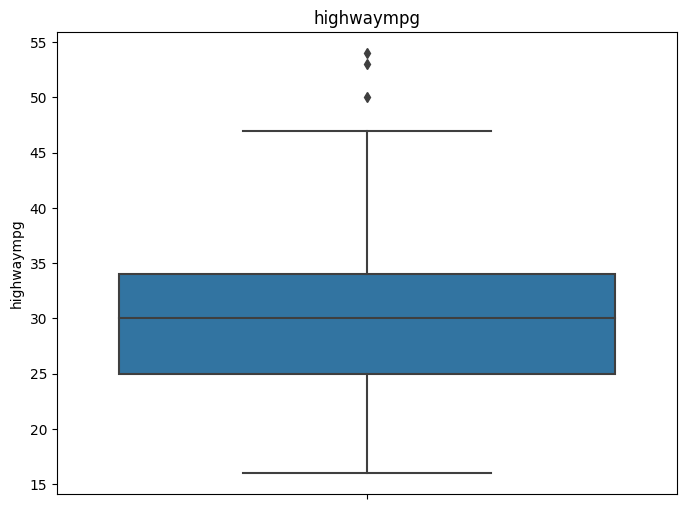

c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


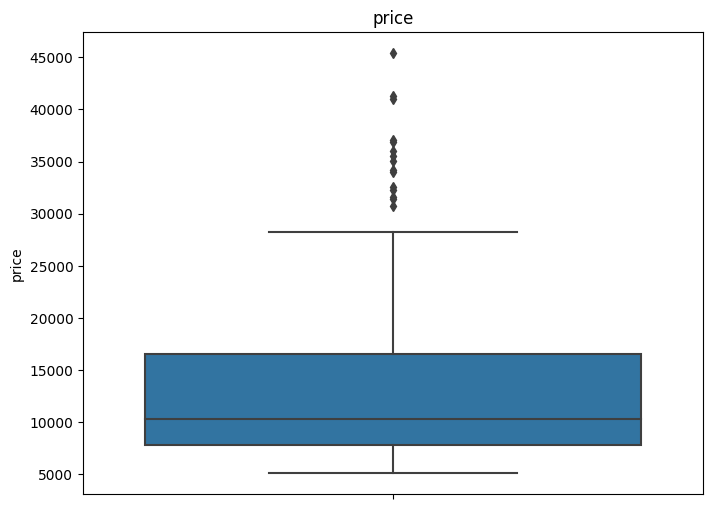

In [7]:
# Boxplots para identificar outliers
numeric_columns = df.select_dtypes(include=[np.number]).columns
for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=df[column])
    plt.title(column)
    plt.show()

### Matriz de Correlación
Este bloque genera una matriz de correlación para todas las variables numéricas. La correlación mide la relación lineal entre dos variables. El valor de correlación varía entre -1 y 1. Un valor cercano a 1 implica una fuerte correlación positiva, en otras palabras, a medida que una variable aumenta, la otra también lo hace. Un valor cercano a -1 implica una fuerte correlación negativa, o sea que a medida que una variable aumenta, la otra disminuye.

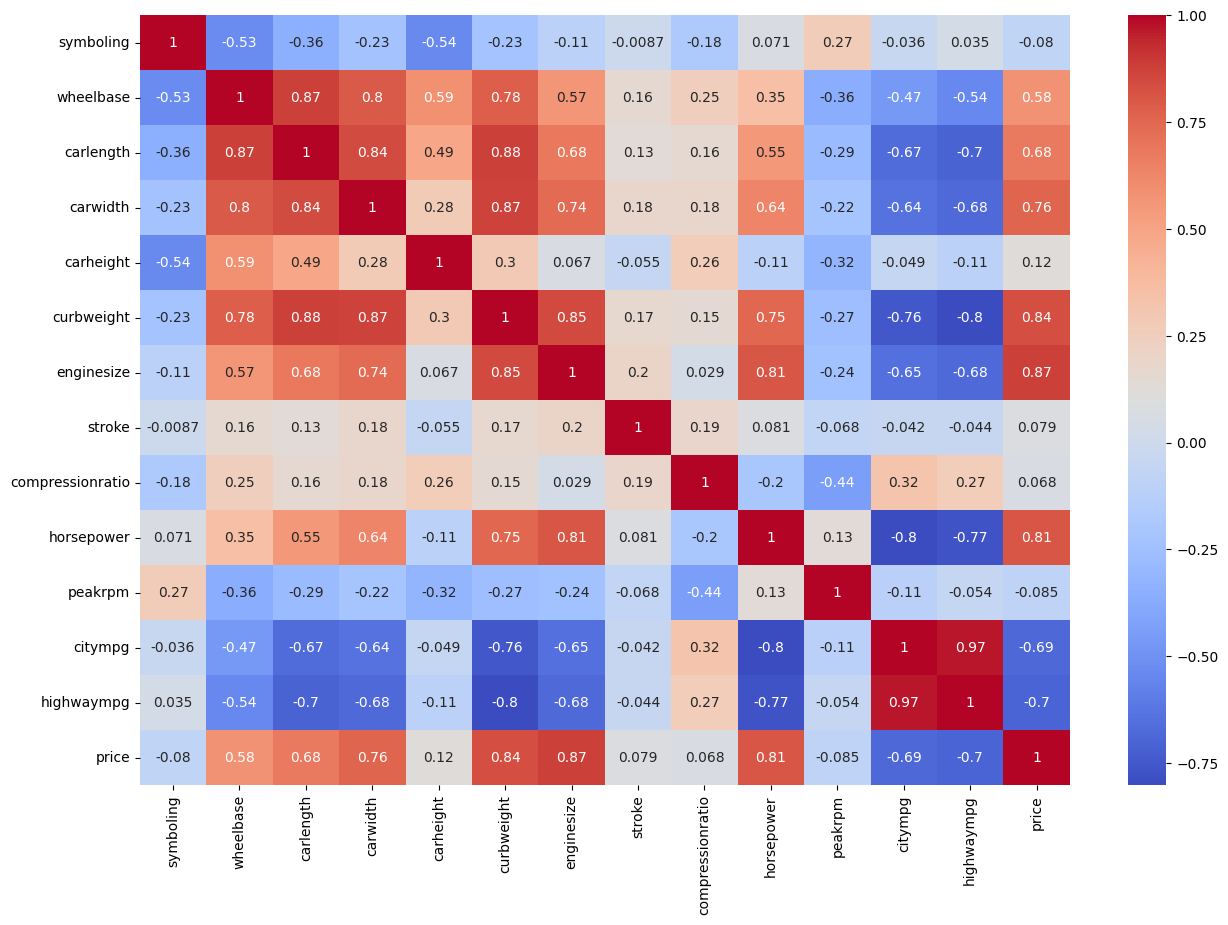

In [8]:
# Coeficiente de correlación solo para columnas numéricas
numeric_columns = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_columns.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()



### Diagramas de Barras
Se utilizan para visualizar la distribución de datos categóricos.



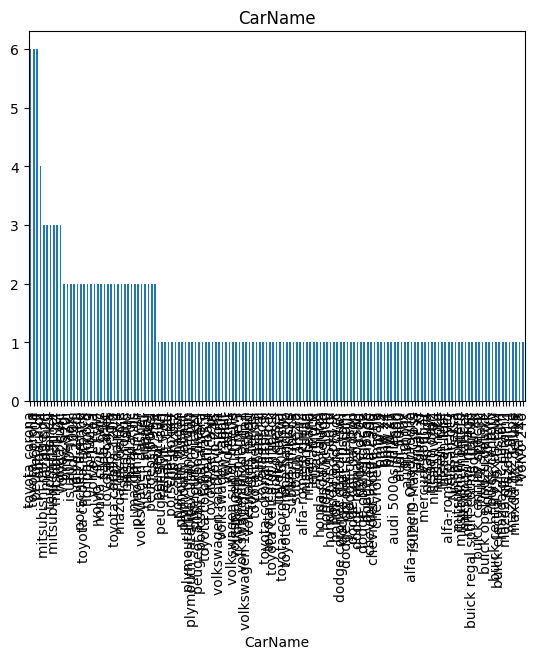

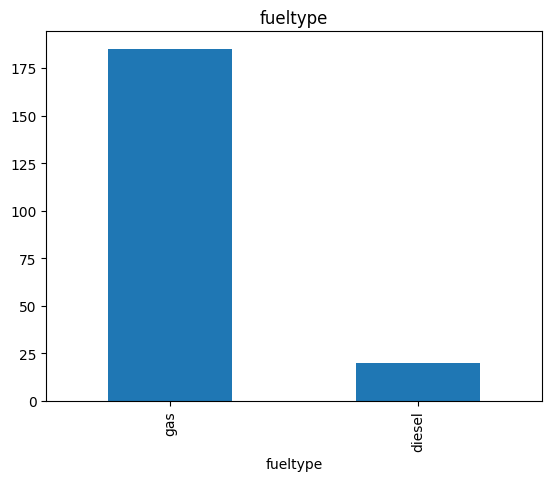

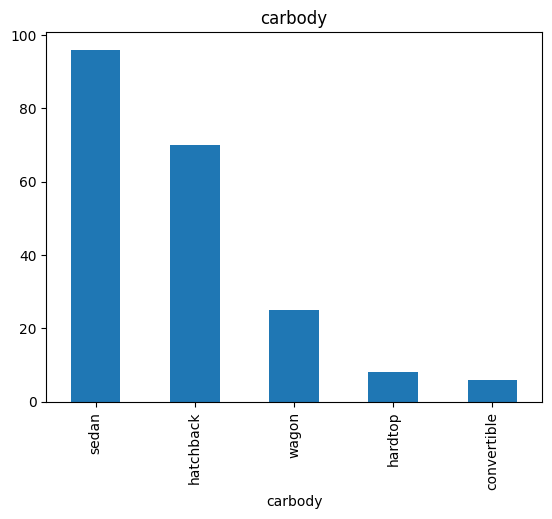

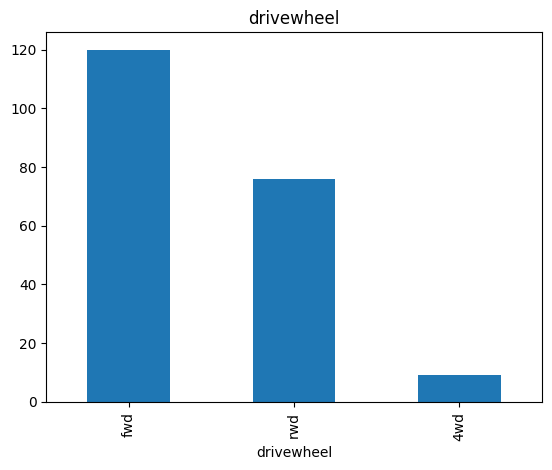

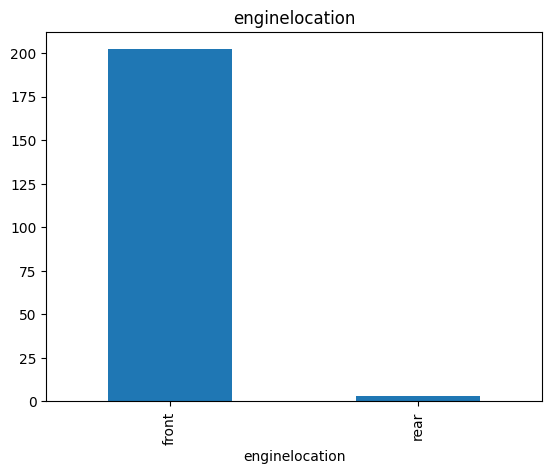

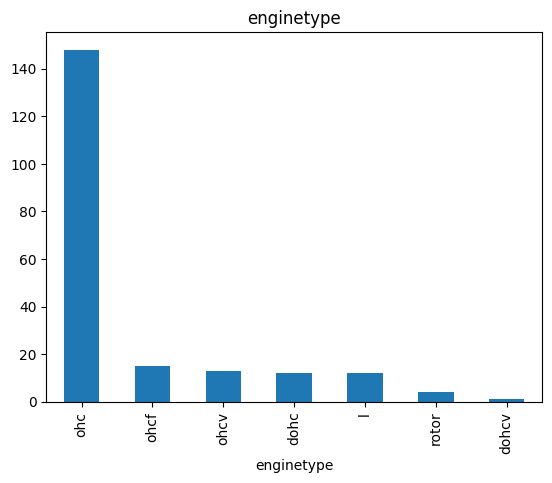

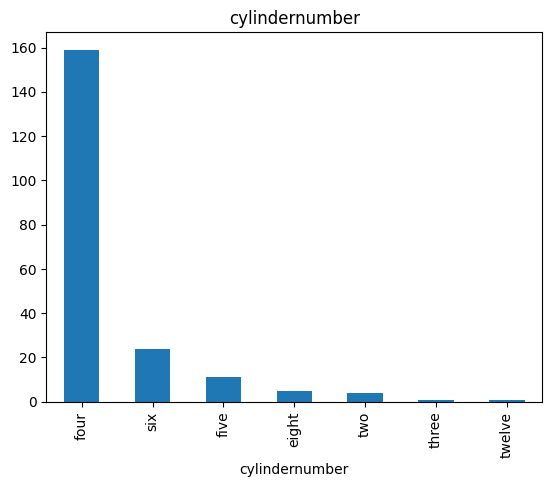

In [9]:
# Diagramas de barras para variables categóricas
categorical_columns = df.select_dtypes(include=[object]).columns
for column in categorical_columns:
    df[column].value_counts().plot(kind='bar', title=column)
    plt.show()

## Plotboxes

c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


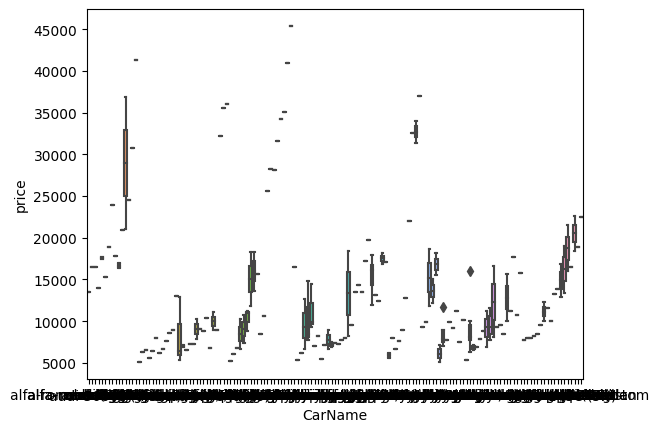

c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


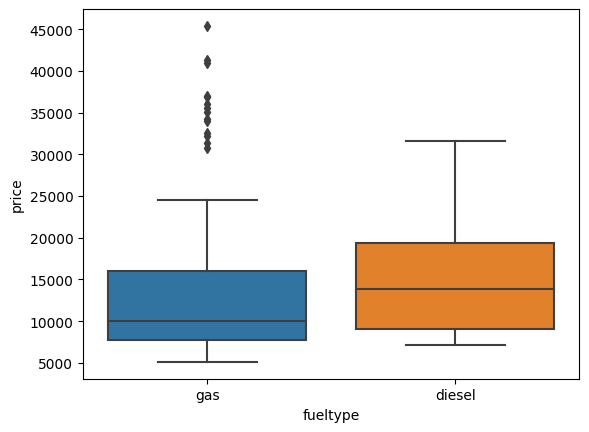

c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


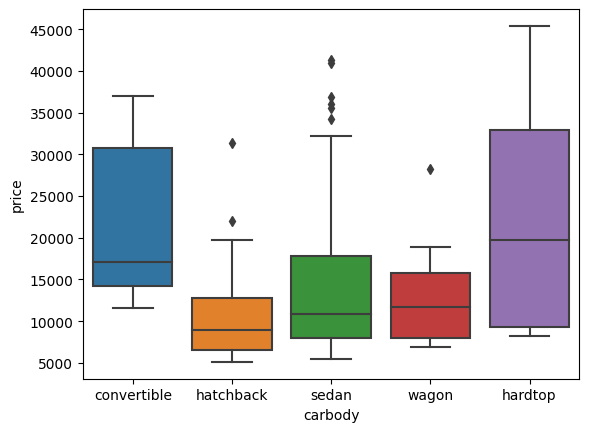

c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


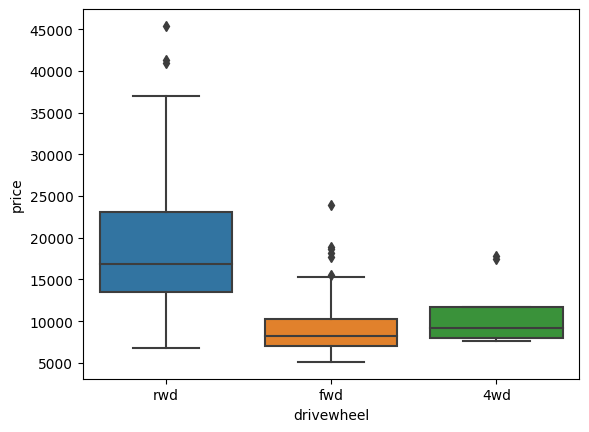

c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


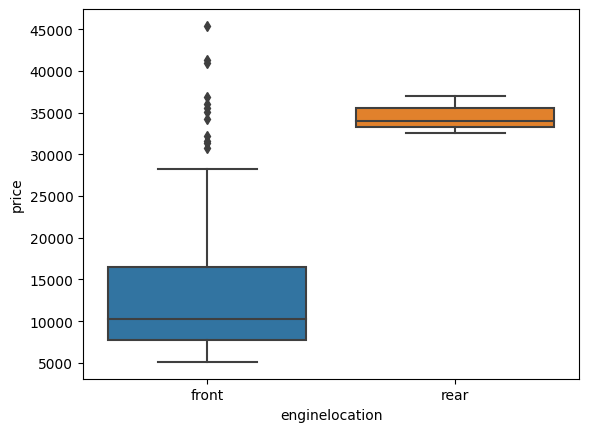

c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


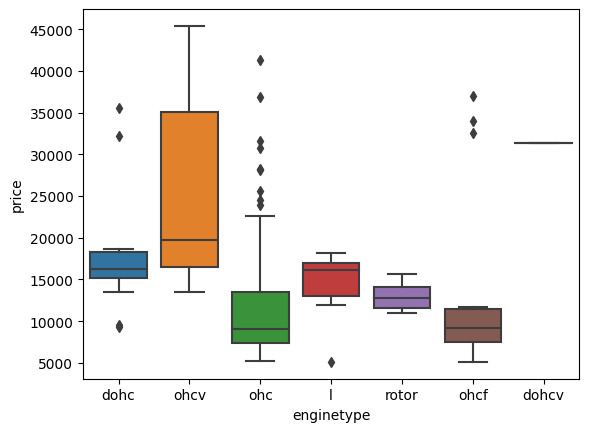

c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


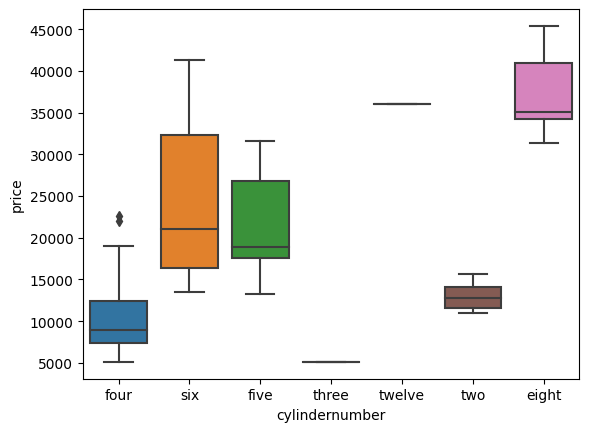

In [10]:
# Diagramas de caja y bigote de precio por categoría
for column in categorical_columns:
    sns.boxplot(x=column, y='price', data=df)
    plt.show()

### Diagramas de dispersión

c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-pa

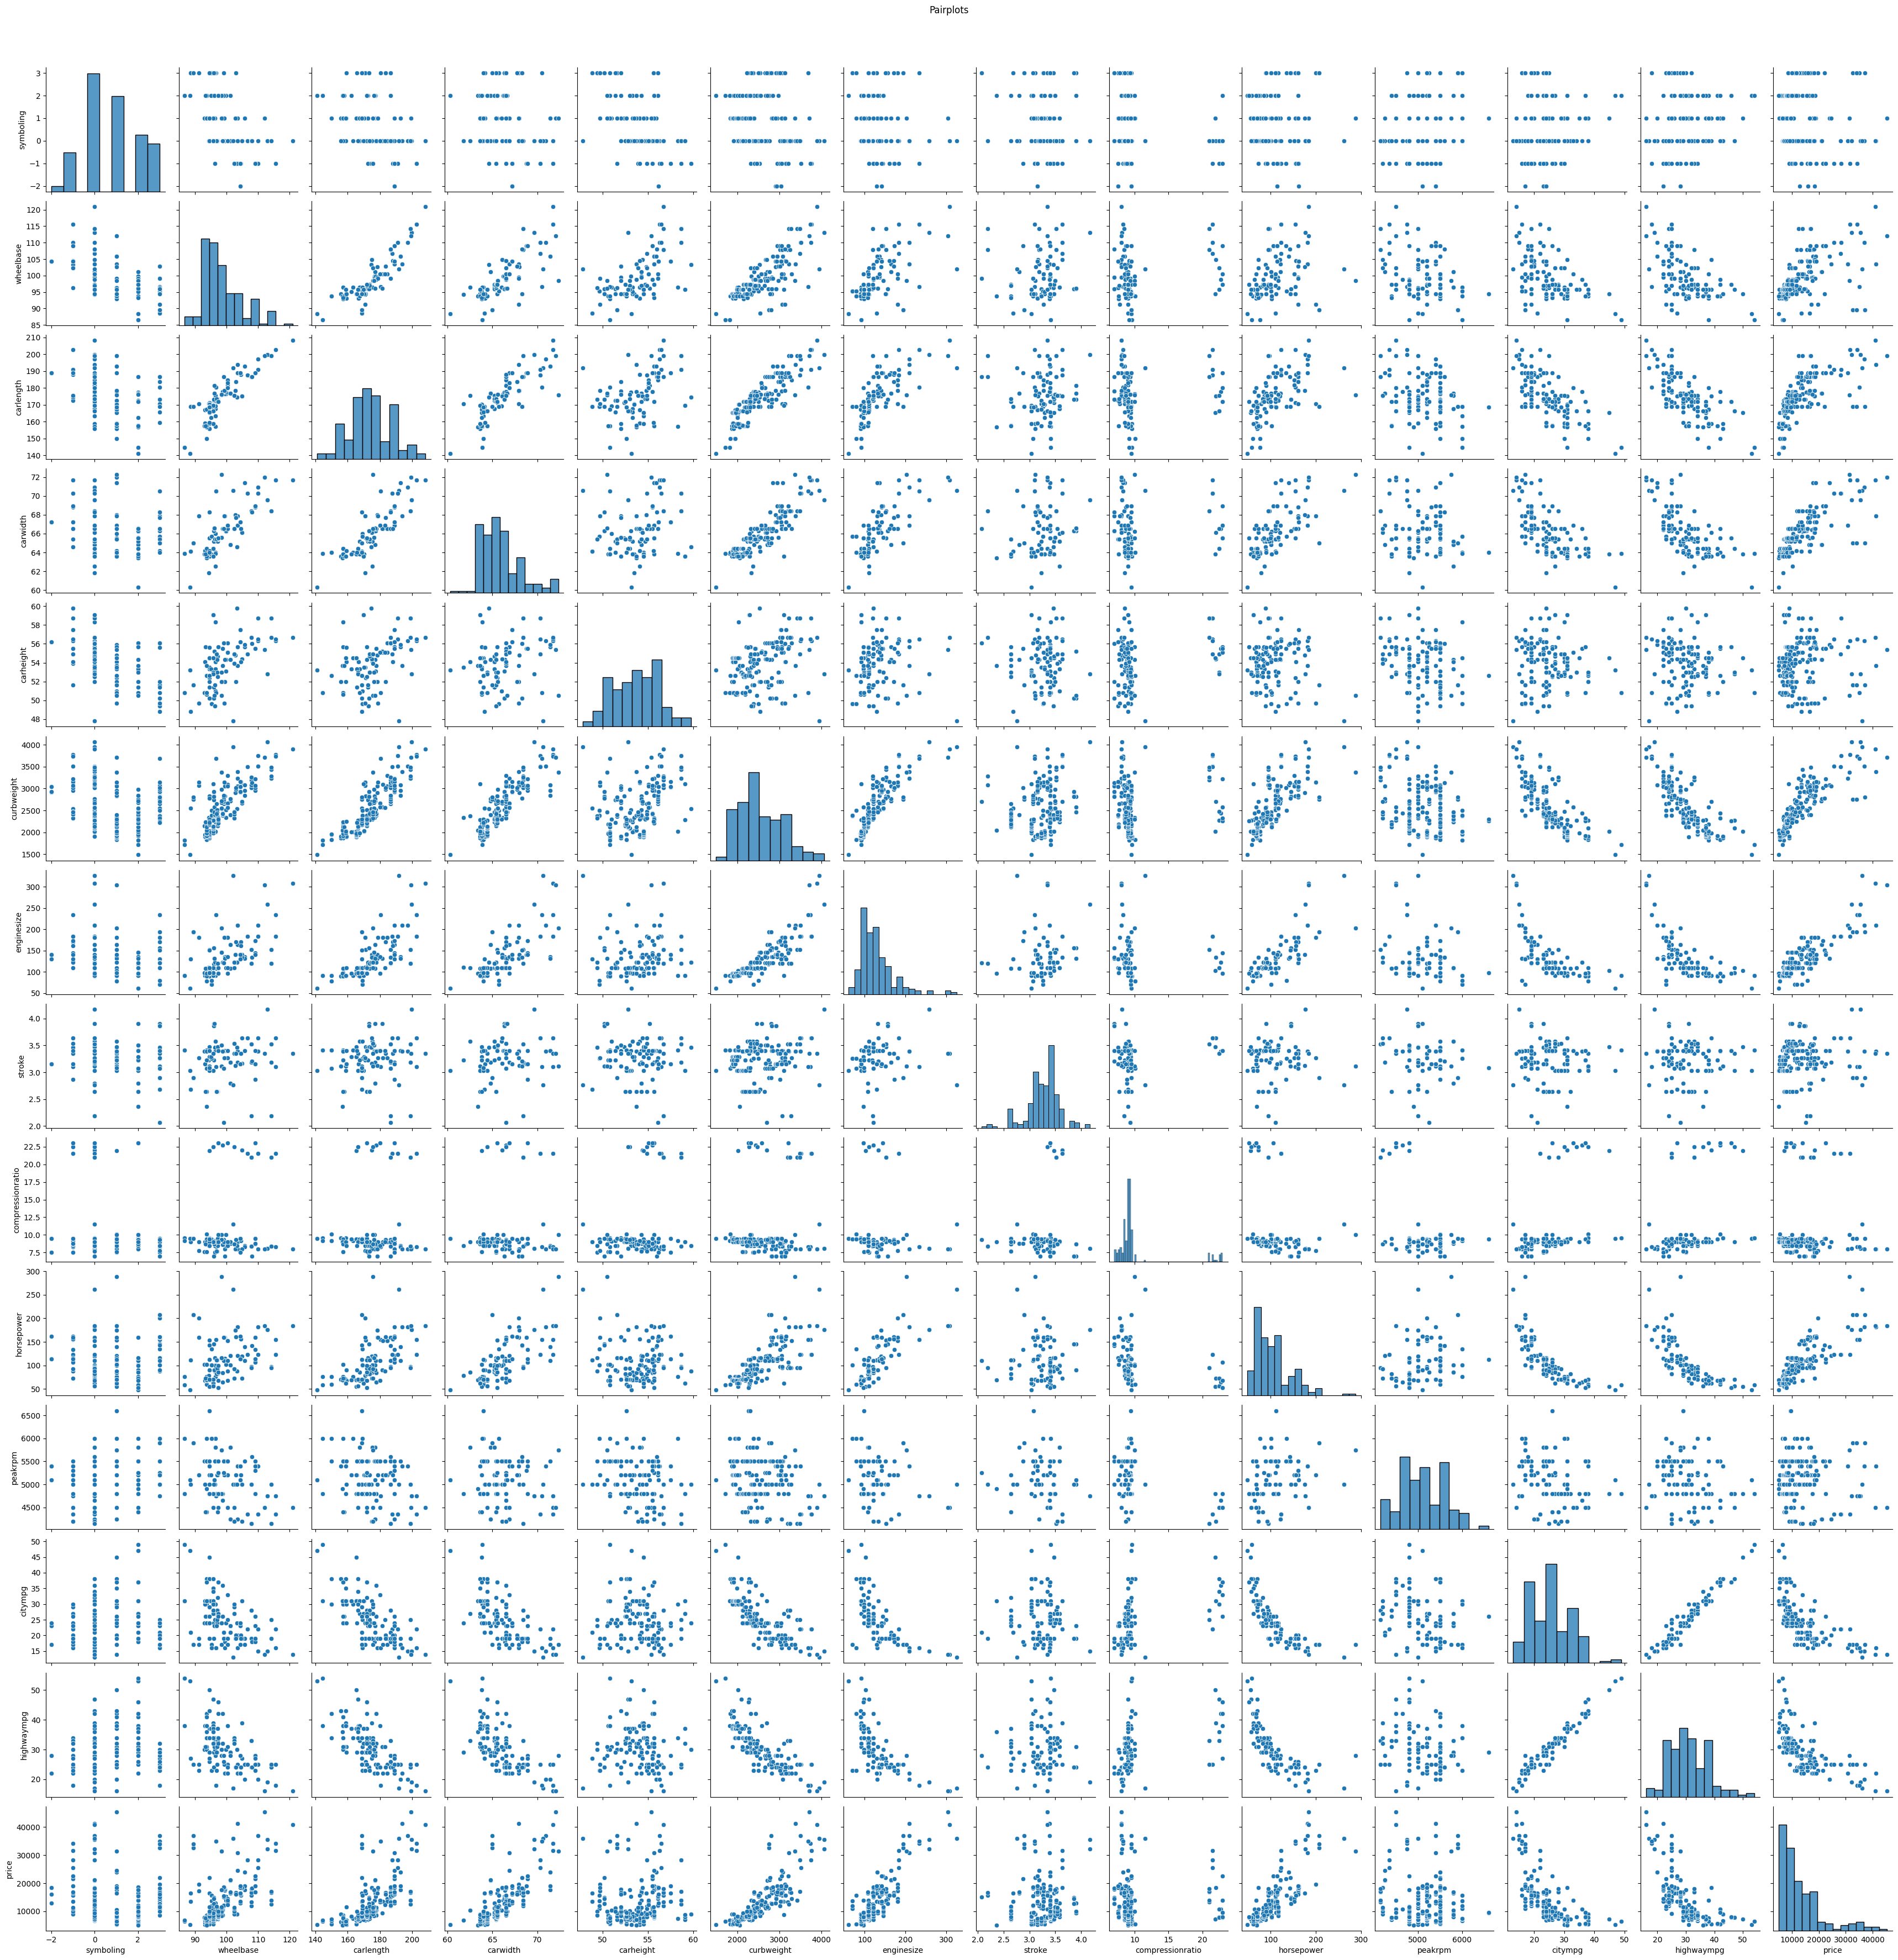

In [11]:
sns.pairplot(df)
plt.suptitle("Pairplots", y=1.02)
plt.show()

### Identificación de Valores Faltantes
Es crucial identificar valores faltantes en el conjunto de datos, ya que pueden afectar el análisis y la precisión de los modelos predictivos. Una vez identificados, se pueden usar diferentes técnicas para manejar estos valores faltantes.

En caso de que en todas las variables de 0 eso quiere decir que no hay ninguna variable que tenga alguna valor faltante.

In [12]:
# Identificar valores faltantes
print(df.isnull().sum())

symboling           0
CarName             0
fueltype            0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


### Seleccion de variables



Basándonos en todo el análisis anterior, seleccionaremos las siguientes 6 variables que consideramos importantes para determinar el precio de los automóviles:

1. **enginesize**: El tamaño del motor es una característica crucial que suele influir en el precio del automóvil. Un motor más grande suele asociarse con vehículos de mayor rendimiento y, por lo tanto, más caros.
2. **curbweight**: El peso del automóvil puede ser un indicativo de su robustez y, posiblemente, de la calidad de los materiales utilizados, lo que afecta el precio.
3. **horsepower**: La potencia del motor es una métrica de rendimiento. Los autos con más caballos de fuerza suelen ser más caros.
4. **carwidth**: La anchura del automóvil puede estar relacionada con características de lujo y espacio, lo que podría influir en el precio.
5. **carlength**: Similar a la anchura, la longitud del automóvil puede indicar un vehículo más grande y espacioso, lo que podría justificar un precio más alto.
6. **cylindernumber**: El número de cilindros es determinante para la potencia del vehiculo lo que podría justificar un precio más alto.

Estas variables fueron seleccionadas principalmente por su alta correlación con el precio y su relevancia en el contexto de la industria automotriz.


In [13]:
# Seleccionar 6 variables importantes basadas en la correlación con el precio y la descripción del problema
numeric_columns = df.select_dtypes(include=[np.number])
correlation_with_price = numeric_columns.corr()['price'].sort_values(ascending=False)
selected_features = correlation_with_price.index[1:7].tolist()
selected_features[selected_features.index('wheelbase')] = 'cylindernumber'
print("Variables seleccionadas:", selected_features)

Variables seleccionadas: ['enginesize', 'curbweight', 'horsepower', 'carwidth', 'carlength', 'cylindernumber']


### Manejo de Variables Categóricas

En este caso se reemplazara los valores de cylindernumber a valores int

In [14]:
# Mapeo de palabras en inglés a sus equivalentes numéricos
cylinder_mapping = {
    'two' : 2,
    'three' : 3,
    'four': 4,
    'five': 5,
    'six': 6,
    'eight': 8,
    'twelve': 12
}
# Reemplazar las palabras en la columna 'cylindernumber' con los valores numéricos correspondientes
df['cylindernumber'] = df['cylindernumber'].replace(cylinder_mapping)

# Verificar los cambios
print(df['cylindernumber'])

df[selected_features].head()

0      4
1      4
2      6
3      4
4      5
      ..
200    4
201    4
202    6
203    6
204    4
Name: cylindernumber, Length: 205, dtype: int64


,enginesize,curbweight,horsepower,carwidth,carlength,cylindernumber
0,130,2548,111,64.1,168.8,4
1,130,2548,111,64.1,168.8,4
2,152,2823,154,65.5,171.2,6
3,109,2337,102,66.2,176.6,4
4,136,2824,115,66.4,176.6,5



### Diagramas de Dispersión para Variables Seleccionadas

Los siguientes diagramas de dispersión muestran las relaciones entre las variables seleccionadas. Estos diagramas ayudan a visualizar la colinealidad entre las variables y detectar cualquier relación lineal evidente entre ellas.


c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-pa

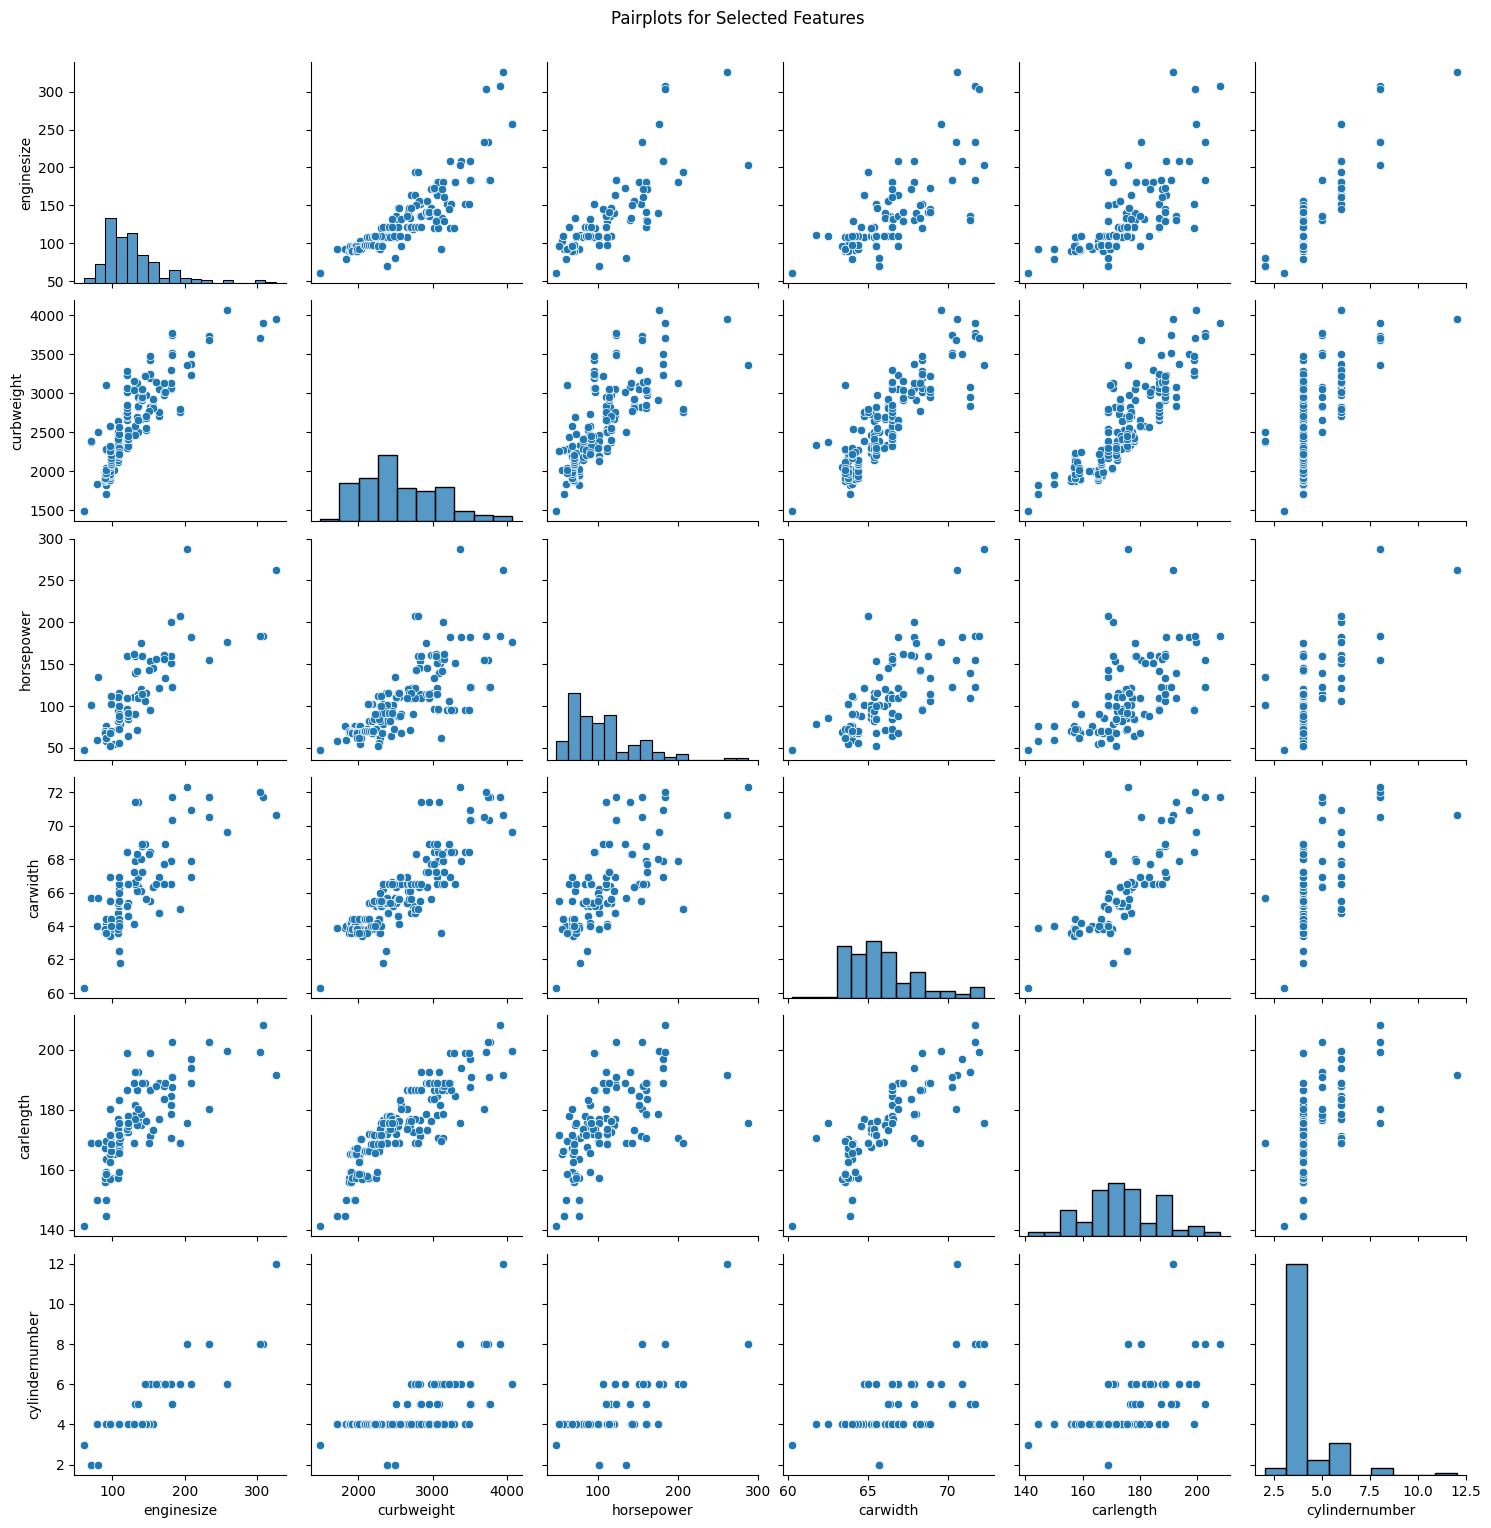

In [15]:
# Grafica de dispersion
sns.pairplot(df[selected_features])
plt.suptitle("Pairplots for Selected Features", y=1.02)
plt.show()

### Identificación y Tratamiento de Outliers

In [16]:

for col in numeric_columns:
    upper_limit = df[col].quantile(0.99)
    # Si un valor en la columna es mayor que el límite superior (percentil 99), 
    # se reemplaza con el límite superior. De lo contrario, se mantiene el valor original.
    df[col] = df[col].apply(lambda x: upper_limit if x > upper_limit else x)


### Escala y Normalización de Datos

### Transformación de Datos

In [17]:

cols_to_transform = selected_features
for col in cols_to_transform:
    # Aplica la transformación logarítmica a cada valor en la columna.
    # La función np.log1p(x) calcula el logaritmo natural de (1 + x).
    df[col] = df[col].apply(lambda x: np.log1p(x))


## Regresión Lineal Múltiple

Elegimos la regresión lineal múltiple porque nuestro objetivo es predecir una variable cuantitativa (precio) en función de múltiples características. La regresión lineal nos permite comprender cómo cambia la variable dependiente en función de las variables independientes, y cuánto de la variabilidad en la variable dependiente es explicada por las variables independientes.

In [18]:
# Splitting the dataset into training and testing sets
X = df[selected_features]
y = np.log1p(df['price'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Training the linear regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

# Calculating performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mse, r2

(0.044761118334074014, 0.8258662086528401)

## Validación del Modelo

c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


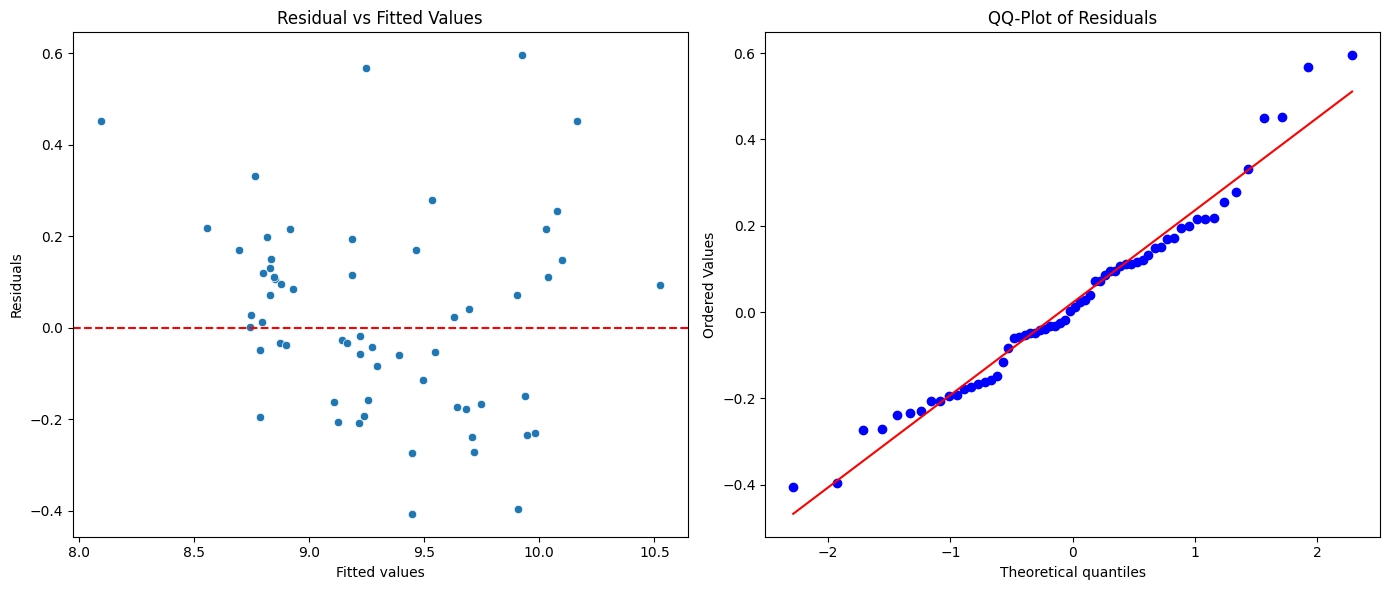

In [19]:

residuals = y_test - y_pred
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual vs Fitted Values')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.subplot(1, 2, 2)
stats.probplot(residuals, plot=plt)
plt.title('QQ-Plot of Residuals')
plt.tight_layout()
plt.show()
    

## Conclusión
El modelo de regresión lineal construido en el notebook utilizando las variables seleccionadas produce un $R^2$ de 0.8266 Esto significa que las variables seleccionadas explican aproximadamente el 82.66% y podemos concluir que las variables seleccionadas describen bastante bien el precio de un automovil
